In [1]:
!git clone https://github.com/aryan51k/american_sign_language_reconizer.git

Cloning into 'American-Sign-Language-Recognizer'...
remote: Enumerating objects: 26, done.
remote: Total 26 (delta 0), reused 0 (delta 0), pack-reused 26
Unpacking objects: 100% (26/26), done.


In [2]:
%cd /content/American-Sign-Language-Recognizer/

/content/American-Sign-Language-Recognizer


In [3]:
import numpy as np
import pandas as pd

from asl_data import AslDb



In [4]:
asl = AslDb()

In [5]:
asl.df.head()

left-x  left-y  right-x  right-y  nose-x  nose-y  speaker
video frame                                                           
98    0         149     181      170      175     161      62  woman-1
      1         149     181      170      175     161      62  woman-1
      2         149     181      170      175     161      62  woman-1
      3         149     181      170      175     161      62  woman-1
      4         149     181      170      175     161      62  woman-1

In [6]:
asl.df.loc[98,1]

left-x         149
left-y         181
right-x        170
right-y        175
nose-x         161
nose-y          62
speaker    woman-1
Name: (98, 1), dtype: object

Now getting the coordinates in terms of nose as the origin 

In [7]:
asl.df['grnd-ry'] = asl.df['right-y'] - asl.df['nose-y']
asl.df.head()

left-x  left-y  right-x  right-y  nose-x  nose-y  speaker  grnd-ry
video frame                                                                    
98    0         149     181      170      175     161      62  woman-1      113
      1         149     181      170      175     161      62  woman-1      113
      2         149     181      170      175     161      62  woman-1      113
      3         149     181      170      175     161      62  woman-1      113
      4         149     181      170      175     161      62  woman-1      113

In [8]:
asl.df['grnd-ly'] = asl.df['left-y'] - asl.df['nose-y']
asl.df['grnd-rx'] = asl.df['right-x'] - asl.df['nose-x']
asl.df['grnd-lx'] = asl.df['left-x'] - asl.df['nose-x']
asl.df.loc[98]

,left-x,left-y,right-x,right-y,nose-x,nose-y,speaker,grnd-ry,grnd-ly,grnd-rx,grnd-lx
frame,,,,,,,,,,,
0,149,181,170,175,161,62,woman-1,113,119,9,-12
1,149,181,170,175,161,62,woman-1,113,119,9,-12
2,149,181,170,175,161,62,woman-1,113,119,9,-12
3,149,181,170,175,161,62,woman-1,113,119,9,-12
4,149,181,170,175,161,62,woman-1,113,119,9,-12
...,...,...,...,...,...,...,...,...,...,...,...
94,149,182,170,170,159,57,woman-1,113,125,11,-10
95,149,182,170,170,159,57,woman-1,113,125,11,-10
96,149,182,170,170,159,57,woman-1,113,125,11,-10


In [9]:
asl.df.loc[98, 75]

left-x         181
left-y         119
right-x        153
right-y        117
nose-x         159
nose-y          57
speaker    woman-1
grnd-ry         60
grnd-ly         62
grnd-rx         -6
grnd-lx         22
Name: (98, 75), dtype: object

## Now displying the ground truth values for video 98 and frame 1

In [10]:
features_ground = ['grnd-rx','grnd-ry','grnd-lx','grnd-ly']
[asl.df.loc[98,1][v] for v in features_ground]

[9, 113, -12, 119]

In [11]:
training = asl.build_training(features_ground)
print("Training words: {}".format(training.words))

Training words: ['JOHN', 'WRITE', 'HOMEWORK', 'IX-1P', 'SEE', 'YESTERDAY', 'IX', 'LOVE', 'MARY', 'CAN', 'GO', 'GO1', 'FUTURE', 'GO2', 'PARTY', 'FUTURE1', 'HIT', 'BLAME', 'FRED', 'FISH', 'WONT', 'EAT', 'BUT', 'CHICKEN', 'VEGETABLE', 'CHINA', 'PEOPLE', 'PREFER', 'BROCCOLI', 'LIKE', 'LEAVE', 'SAY', 'BUY', 'HOUSE', 'KNOW', 'CORN', 'CORN1', 'THINK', 'NOT', 'PAST', 'LIVE', 'CHICAGO', 'CAR', 'SHOULD', 'DECIDE', 'VISIT', 'MOVIE', 'WANT', 'SELL', 'TOMORROW', 'NEXT-WEEK', 'NEW-YORK', 'LAST-WEEK', 'WILL', 'FINISH', 'ANN', 'READ', 'BOOK', 'CHOCOLATE', 'FIND', 'SOMETHING-ONE', 'POSS', 'BROTHER', 'ARRIVE', 'HERE', 'GIVE', 'MAN', 'NEW', 'COAT', 'WOMAN', 'GIVE1', 'HAVE', 'FRANK', 'BREAK-DOWN', 'SEARCH-FOR', 'WHO', 'WHAT', 'LEG', 'FRIEND', 'CANDY', 'BLUE', 'SUE', 'BUY1', 'STOLEN', 'OLD', 'STUDENT', 'VIDEOTAPE', 'BORROW', 'MOTHER', 'POTATO', 'TELL', 'BILL', 'THROW', 'APPLE', 'NAME', 'SHOOT', 'SAY-1P', 'SELF', 'GROUP', 'JANA', 'TOY1', 'MANY', 'TOY', 'ALL', 'BOY', 'TEACHER', 'GIRL', 'BOX', 'GIVE2', 'GIVE3

In [12]:
training.get_word_Xlengths('BREAK-DOWN')

(array([[-19,  43,  28,  46],
        [-22,  39,  28,  46],
        [-22,  39,  28,  46],
        [-22,  39,  28,  35],
        [-22,  39,  28,  35],
        [-22,  39,  24,  40],
        [-21,  38,  25,  39],
        [-15,  47,  21,  51],
        [-13,  52,  21,  54],
        [ -8,  55,  20,  56],
        [ -7,  61,  17,  60],
        [ -8,  66,  20,  66],
        [ -8,  66,  21,  70],
        [-12,  74,  15,  78],
        [-14,  85,  17,  87],
        [-15,  93,  21, 100],
        [-18, 108,  17, 108],
        [-17,  31,  35,  39],
        [-16,  34,  32,  37],
        [-15,  32,  33,  35],
        [-15,  32,  33,  35],
        [-12,  34,  25,  34],
        [ -7,  38,  21,  37],
        [-10,  44,  18,  46],
        [ -7,  50,  22,  53],
        [ -7,  50,  22,  53],
        [ -3,  57,  20,  61],
        [ -3,  57,  20,  61],
        [ -6,  60,  22,  62],
        [ -6,  60,  22,  62],
        [ -6,  60,  22,  62],
        [-23,  36,  28,  41],
        [-18,  36,  28,  36],
        [-

In [13]:
df_means = asl.df.groupby('speaker').mean()
df_means

,left-x,left-y,right-x,right-y,nose-x,nose-y,grnd-ry,grnd-ly,grnd-rx,grnd-lx
speaker,,,,,,,,,,
man-1,206.248203,218.679449,155.464350,150.371031,175.031756,61.642600,88.728430,157.036848,-19.567406,31.216447
woman-1,164.661438,161.271242,151.017865,117.332462,162.655120,57.245098,60.087364,104.026144,-11.637255,2.006318
woman-2,183.214509,176.527232,156.866295,119.835714,170.318973,58.022098,61.813616,118.505134,-13.452679,12.895536


In [14]:
asl.df['left-x-mean']= asl.df['speaker'].map(df_means['left-x'])
asl.df.head()

left-x  left-y  right-x  ...  grnd-rx  grnd-lx  left-x-mean
video frame                           ...                               
98    0         149     181      170  ...        9      -12   164.661438
      1         149     181      170  ...        9      -12   164.661438
      2         149     181      170  ...        9      -12   164.661438
      3         149     181      170  ...        9      -12   164.661438
      4         149     181      170  ...        9      -12   164.661438

[5 rows x 12 columns]

In [15]:
from asl_utils import test_std_tryit
df_std = asl.df.groupby('speaker').std()
df_std.head()

,left-x,left-y,right-x,right-y,nose-x,nose-y,grnd-ry,grnd-ly,grnd-rx,grnd-lx,left-x-mean
speaker,,,,,,,,,,,
man-1,15.154425,36.328485,18.901917,54.902340,6.654573,5.520045,53.487999,36.572749,20.269032,15.080360,0.0
woman-1,17.573442,26.594521,16.459943,34.667787,3.549392,3.538330,33.972660,27.117393,16.764706,17.328941,0.0
woman-2,15.388711,28.825025,14.890288,39.649111,4.099760,3.416167,39.128572,29.320655,16.191324,15.050938,0.0


In [16]:
asl.df['speaker'].map(df_means['left-x'])

video  frame
98     0        164.661438
       1        164.661438
       2        164.661438
       3        164.661438
       4        164.661438
                   ...    
125    52       164.661438
       53       164.661438
       54       164.661438
       55       164.661438
       56       164.661438
Name: speaker, Length: 15746, dtype: float64

## Normalizing using Z-score scaling (X-Xmean)/Xstd

In [17]:
def normalize(data):
  mean = asl.df['speaker'].map(df_means[data])
  std = asl.df['speaker'].map(df_std[data])
  return (asl.df[data] - mean) / std


features_norm = ['norm-rx', 'norm-ry', 'norm-lx', 'norm-ly']

asl.df['norm-lx'] = normalize('left-x')
asl.df['norm-ly'] = normalize('left-y')
asl.df['norm-rx'] = normalize('right-x')
asl.df['norm-ry'] = normalize('right-y')


## Polar coordinates 

* Summary: to convert from Cartesian Coordinates (x,y) to Polar Coordinates (r,θ):
r = √ ( x2 + y2 )
θ = tan-1 ( y / x )

Here I have kep the values in terms of inverse of theta 


In [18]:
features_polar = ['polar-rr', 'polar-rtheta', 'polar-lr', 'polar-ltheta']
rx = asl.df['right-x'] - asl.df['nose-x']
ry = asl.df['right-y'] - asl.df['nose-y']
asl.df['polar-rr'] = np.sqrt(rx**2 + ry**2)
asl.df['polar-rtheta'] = np.arctan2(rx, ry)
lx = asl.df['left-x'] - asl.df['nose-x']
ly = asl.df['left-y'] - asl.df['nose-y']
asl.df['polar-lr'] = np.sqrt(lx**2 + ly**2)
asl.df['polar-ltheta'] = np.arctan2(lx, ly)
df_std = asl.df.groupby('speaker').std()
df_means = asl.df.groupby('speaker').mean()

In [19]:
asl.df.head()

left-x  left-y  right-x  ...  polar-rtheta    polar-lr  polar-ltheta
video frame                           ...                                        
98    0         149     181      170  ...      0.079478  119.603512     -0.100501
      1         149     181      170  ...      0.079478  119.603512     -0.100501
      2         149     181      170  ...      0.079478  119.603512     -0.100501
      3         149     181      170  ...      0.079478  119.603512     -0.100501
      4         149     181      170  ...      0.079478  119.603512     -0.100501

[5 rows x 20 columns]

In [20]:
features_delta_values = ['delta-lx', 'delta-ly', 'delta-rx', 'delta-ry']

asl.df['delta-lx'] = asl.df['left-x'].diff().fillna(0)
asl.df['delta-ly'] = asl.df['left-y'].diff().fillna(0)
asl.df['delta-rx'] = asl.df['right-x'].diff().fillna(0)
asl.df['delta-ry'] = asl.df['right-y'].diff().fillna(0)
asl.df.head()

left-x  left-y  right-x  ...  delta-ly  delta-rx  delta-ry
video frame                           ...                              
98    0         149     181      170  ...       0.0       0.0       0.0
      1         149     181      170  ...       0.0       0.0       0.0
      2         149     181      170  ...       0.0       0.0       0.0
      3         149     181      170  ...       0.0       0.0       0.0
      4         149     181      170  ...       0.0       0.0       0.0

[5 rows x 24 columns]

In [21]:
features_custom = ['norm-grnd-rx', 'norm-grnd-ry', 'norm-grnd-lx', 'norm-grnd-ly']
addtn_features_custom = ['norm-polar-rr', 'norm-polar-rtheta', 'norm-polar-lr', 'norm-polar-ltheta']
asl.df['norm-grnd-rx'] = normalize('grnd-rx')
asl.df['norm-grnd-ry'] = normalize('grnd-ry')
asl.df['norm-grnd-lx'] = normalize('grnd-lx')
asl.df['norm-grnd-ly'] = normalize('grnd-ly')
asl.df['norm-polar-rr'] = normalize('polar-rr')
asl.df['norm-polar-lr'] = normalize('polar-lr')
asl.df['norm-polar-rtheta'] = normalize('polar-rtheta')
asl.df['norm-polar-ltheta'] = normalize('polar-ltheta')

In [22]:
asl.df.head()

left-x  left-y  ...  norm-polar-rtheta  norm-polar-ltheta
video frame                  ...                                      
98    0         149     181  ...           0.959419          -0.735219
      1         149     181  ...           0.959419          -0.735219
      2         149     181  ...           0.959419          -0.735219
      3         149     181  ...           0.959419          -0.735219
      4         149     181  ...           0.959419          -0.735219

[5 rows x 32 columns]

## Creating a function that train the model for single word 

In [23]:
! pip install hmmlearn

     |████████████████████████████████| 374 kB 5.1 MB/s 


Here X has array of coordinates for the word specified and the lengths array shows the famelength of the same 

In [24]:
from hmmlearn.hmm import  GaussianHMM
# import warning

def train_a_word(word, hidden_states, features):
  training = asl.build_training(features)
  X, length = training.get_word_Xlengths(word)
  model = GaussianHMM(n_components = hidden_states, n_iter = 1000)
  model.fit(X, length)
  logL = model.score(X, length)
  return model, logL

demo = 'BOOK'
model, logL = train_a_word(demo, 3, features_ground)
print("Number of states trained in model for {} is {}".format(demo, model.n_components))
print("logL = {}".format(logL))


Number of states trained in model for BOOK is 3
logL = -2331.113812743319


In [25]:
def show_model_stats(word, model):
    print("Number of states trained in model for {} is {}".format(word, model.n_components))    
    variance=np.array([np.diag(model.covars_[i]) for i in range(model.n_components)])    
    for i in range(model.n_components):  # for each hidden state
        print("hidden state #{}".format(i))
        print("mean = ", model.means_[i])
        print("variance = ", variance[i])
        print()
    
show_model_stats(demo, model)

Number of states trained in model for BOOK is 3
hidden state #0
mean =  [-1.12415027 69.44164191 17.02866283 77.7231196 ]
variance =  [19.70434594 16.83041492 30.51552305 11.03678246]

hidden state #1
mean =  [-11.45300909  94.109178    19.03512475 102.2030162 ]
variance =  [ 77.403668   203.35441965  26.68898447 156.12444034]

hidden state #2
mean =  [-3.46504869 50.66686933 14.02391587 52.04731066]
variance =  [49.12346305 43.04799144 39.35109609 47.24195772]



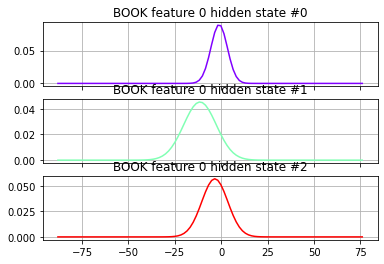

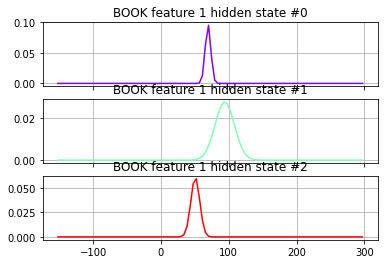

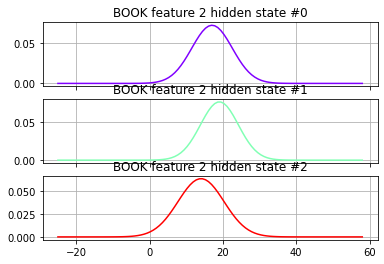

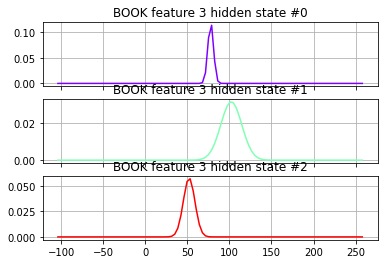

In [26]:
import math
from matplotlib import (cm, pyplot as plt, mlab)
from scipy.stats import norm

def visualize(word, model):
    """ visualize the input model for a particular word """
    variance=np.array([np.diag(model.covars_[i]) for i in range(model.n_components)])
    figures = []
    for parm_idx in range(len(model.means_[0])):
        xmin = int(min(model.means_[:,parm_idx]) - max(variance[:,parm_idx]))
        xmax = int(max(model.means_[:,parm_idx]) + max(variance[:,parm_idx]))
        fig, axs = plt.subplots(model.n_components, sharex=True, sharey=False)
        colours = cm.rainbow(np.linspace(0, 1, model.n_components))
        for i, (ax, colour) in enumerate(zip(axs, colours)):
            x = np.linspace(xmin, xmax, 100)
            mu = model.means_[i,parm_idx]
            sigma = math.sqrt(np.diag(model.covars_[i])[parm_idx])
            ax.plot(x, norm.pdf(x, mu, sigma), c=colour)
            ax.set_title("{} feature {} hidden state #{}".format(word, parm_idx, i))

            ax.grid(True)
        figures.append(plt)
    for p in figures:
        p.show()
        
visualize(demo, model)

https://rdrr.io/cran/HMMpa/man/AIC_HMM.html

Now I have modified the file my_model_selector and have obtained the required information from here to create the BIC score for the model

In [33]:
from my_model_selectors import SelectorConstant

training = asl.build_training(features_ground)
word = 'VEGETABLE'
model = SelectorConstant(training.get_all_sequences(), training.get_all_Xlengths(), word, n_constant=3).select()
print("Number of states trained in model for {} is {}".format(word, model.n_components))

Number of states trained in model for VEGETABLE is 3


## Cross validation folds
If we simply score the model with the Log Likelihood calculated from the feature sequences it has been trained on, we should expect that more complex models will have higher likelihoods. However, that doesn't tell us which would have a better likelihood score on unseen data. The model will likely be overfit as complexity is added. To estimate which topology model is better using only the training data, we can compare scores using cross-validation. One technique for cross-validation is to break the training set into "folds" and rotate which fold is left out of training. The "left out" fold scored. This gives us a proxy method of finding the best model to use on "unseen data". In the following example, a set of word sequences is broken into three folds using the scikit-learn Kfold class object.

In [40]:
from sklearn.model_selection import KFold

training = asl.build_training(features_ground)
word = 'VEGETABLE'

word_sequence = training.get_word_sequences(word)
split_method = KFold(n_splits = 3)

for train_split, test_split in split_method.split(word_sequence):
  print("Train fold indices:{} Test fold indices:{}".format(train_split, test_split))



Train fold indices:[2 3 4 5] Test fold indices:[0 1]
Train fold indices:[0 1 4 5] Test fold indices:[2 3]
Train fold indices:[0 1 2 3] Test fold indices:[4 5]


In [41]:
words_to_train = ['FISH', 'BOOK', 'VEGETABLE', 'FUTURE', 'JOHN']
import timeit


In [42]:
%load_ext autoreload
%autoreload 2

In [43]:
from my_model_selectors import SelectorCV

training = asl.build_training(features_custom)
sequences = training.get_all_sequences()
Xlengths = training.get_all_Xlengths()
for word in words_to_train:
    start = timeit.default_timer()
    model = SelectorCV(sequences, Xlengths, word, 
                    min_n_components=2, max_n_components=15, random_state = 14).select()
    end = timeit.default_timer()-start
    if model is not None:
        print("Training complete for {} with {} states with time {} seconds".format(word, model.n_components, end))
    else:
        print("Training failed for {}".format(word))

Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:200: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(X)
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it

Training complete for FISH with 11 states with time 13.515884004999862 seconds


Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'


Training complete for BOOK with 2 states with time 5.055079505999856 seconds


Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'


Training complete for VEGETABLE with 2 states with time 3.4224040889998832 seconds


Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'


Training complete for FUTURE with 2 states with time 4.5135890030001065 seconds


Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'


Training complete for JOHN with 3 states with time 32.844272358000126 seconds


In [47]:
from my_model_selectors import SelectorBIC

training = asl.build_training(features_custom) \
sequences = training.get_all_sequences()
Xlengths = training.get_all_Xlengths()
for word in words_to_train:
    start = timeit.default_timer()
    model = SelectorBIC(sequences, Xlengths, word, 
                    min_n_components=2, max_n_components=15, random_state = 14).select()
    end = timeit.default_timer()-start
    if model is not None:
        print("Training complete for {} with {} states with time {} seconds".format(word, model.n_components, end))
    else:
        print("Training failed for {}".format(word))

Fitting a model with 104 free scalar parameters with only 96 data points will result in a degenerate solution.
Fitting a model with 127 free scalar parameters with only 96 data points will result in a degenerate solution.
Fitting a model with 152 free scalar parameters with only 96 data points will result in a degenerate solution.
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:200: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans.fit(X)
Fitting a model with 179 free scalar parameters with only 96 data points will result in a degenerate solution.
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:200: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans.fit(X)
Fitting a model with 208 free scalar parameters with only 96 data points will result in a degenerate solution.
/usr/local/lib/python3.7/dist-packages/h

Training complete for FISH with 3 states with time 6.364316854999743 seconds
Training complete for BOOK with 7 states with time 3.750766148999901 seconds


Fitting a model with 344 free scalar parameters with only 324 data points will result in a degenerate solution.


Training complete for VEGETABLE with 5 states with time 1.711405449999802 seconds
Training complete for FUTURE with 5 states with time 3.6507256830000188 seconds
Training complete for JOHN with 14 states with time 30.981001916999958 seconds


In [52]:
from my_model_selectors import SelectorDIC
training = asl.build_training(features_custom) 
sequences = training.get_all_sequences()
Xlengths = training.get_all_Xlengths()
for word in words_to_train:
    start = timeit.default_timer()
    model = SelectorDIC(sequences, Xlengths, word, 
                    min_n_components=2, max_n_components=15, random_state = 14).select()
    end = timeit.default_timer()-start
    if model is not None:
        print("Training complete for {} with {} states with time {} seconds".format(word, model.n_components, end))
    else:
        print("Training failed for {}".format(word))

Fitting a model with 104 free scalar parameters with only 96 data points will result in a degenerate solution.
Fitting a model with 127 free scalar parameters with only 96 data points will result in a degenerate solution.
Fitting a model with 152 free scalar parameters with only 96 data points will result in a degenerate solution.
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:200: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans.fit(X)
Fitting a model with 179 free scalar parameters with only 96 data points will result in a degenerate solution.
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:200: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans.fit(X)
Fitting a model with 208 free scalar parameters with only 96 data points will result in a degenerate solution.
/usr/local/lib/python3.7/dist-packages/h

Training complete for FISH with 2 states with time 9.293687283000509 seconds
Training complete for BOOK with 15 states with time 5.9902523709997695 seconds


Fitting a model with 344 free scalar parameters with only 324 data points will result in a degenerate solution.


Training complete for VEGETABLE with 9 states with time 4.07298956699924 seconds
Training complete for FUTURE with 15 states with time 5.917594962999829 seconds
Training complete for JOHN with 15 states with time 33.12374754999928 seconds


In [53]:
from my_model_selectors import SelectorConstant

def train_all_words(features, model_selector):
    training = asl.build_training(features)  
    sequences = training.get_all_sequences()
    Xlengths = training.get_all_Xlengths()
    model_dict = {}
    for word in training.words:
        model = model_selector(sequences, Xlengths, word, 
                        n_constant=3).select()
        model_dict[word]=model
    return model_dict

models = train_all_words(features_ground, SelectorConstant)
print("Number of word models returned = {}".format(len(models)))

Fitting a model with 32 free scalar parameters with only 24 data points will result in a degenerate solution.
Fitting a model with 32 free scalar parameters with only 24 data points will result in a degenerate solution.
Fitting a model with 32 free scalar parameters with only 28 data points will result in a degenerate solution.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Fitting a model with 32 free scalar parameters with only 16 data points will result in a degenerate solution.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Fitting a model with 32 free scalar parameters with only 24 data points will result in a degene

Number of word models returned = 112


In [54]:
test_set = asl.build_test(features_ground)

In [55]:
from my_recognizer import recognize
from asl_utils import show_errors

In [56]:
models = train_all_words(features_ground, SelectorBIC)
test_set = asl.build_test(features_ground)
probability, gausses = recognize(models, test_set)
show_errors(gausses, test_set)

Fitting a model with 127 free scalar parameters with only 116 data points will result in a degenerate solution.
Fitting a model with 152 free scalar parameters with only 116 data points will result in a degenerate solution.
Fitting a model with 179 free scalar parameters with only 116 data points will result in a degenerate solution.
Fitting a model with 127 free scalar parameters with only 108 data points will result in a degenerate solution.
Fitting a model with 152 free scalar parameters with only 108 data points will result in a degenerate solution.
Fitting a model with 179 free scalar parameters with only 108 data points will result in a degenerate solution.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Fitting a model with 152 free scalar parameters with only 128 data points will result in a degenerate solution.
Fitting a model with 179 free scalar parameters with only 128 data points will result in a degenerate solution.
Fitting a m


**** WER = 0.550561797752809
Total correct: 80 out of 178
Video  Recognized                                                    Correct
    2: JOHN WRITE *NEW                                               JOHN WRITE HOMEWORK
    7: *SOMETHING-ONE *GO1 GO *ARRIVE                                JOHN CAN GO CAN
   12: *IX *WHAT *CAN CAN                                            JOHN CAN GO CAN
   21: JOHN *WRITE *JOHN *FUTURE *CAR *TEACHER *VISIT *WHO           JOHN FISH WONT EAT BUT CAN EAT CHICKEN
   25: JOHN *IX IX *LIKE IX                                          JOHN LIKE IX IX IX
   28: JOHN *WHO IX *LIKE *LOVE                                      JOHN LIKE IX IX IX
   30: JOHN LIKE *MARY *MARY *MARY                                   JOHN LIKE IX IX IX
   36: *VISIT *VISIT *IX *GIVE *MARY *IX                             MARY VEGETABLE KNOW IX LIKE CORN1
   40: *MARY *GO *GIVE MARY *MARY                                    JOHN IX THINK MARY LOVE
   43: JOHN *IX BUY HOUSE            